In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#CNN 
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

# Modified National Institute of Standards and Technology database 

# It has a collection of greyscall images with handwritten digits from 0 to 9

In [20]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [21]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [22]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
# x_train,x_test=x_train/255.0,x_test/255.0
#1.) Why to divide by 255
# When we are working with image data,the pixel values are integers in the range [0,255].
# So divide it by 255.0 scales these values to the range [0,1]
# Working with the smaller values increase the stability of optimization algorithm

# tf.keras.layers.Dense(128,activation='relu')
#2.)Why 128 
# It is the specific number of nuerons or units in the dense layer
# relu -->Rectified Linear Unit,It helps to add non-lib=nearity to our algorithm

In [23]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2932 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1424 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1063 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0874 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0743 - accuracy: 0.9769


In [25]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0682 - accuracy: 0.9801


In [27]:
print(test_loss)
print(test_accuracy)

0.0681658685207367
0.9800999760627747


In [ ]:
# Activation function 
# Relu 
# It is one of the most widely  used activation function,It replaces all negative values with zero ,
# leaving the positive value unchanged 

# sigmoid 
# sigmoid reduces the output between 0 and 1 ,making it suitable for binary classification problems

# Tanh (Hyperbolic Tangent):
# It reduces the output between -1 to 1

#Softmax 
#It is mostly used in output layer

# Leaku Relu 
# It is a another varient of Relu that allows a small positive gradient for negative value just to avoid dead neurons

In [28]:
# Project :::1

# Convert image to greyscall using CNN

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# LOad the RGB image
image_path = r"C:\Users\HP\Desktop\dog3.jpeg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.01176471 0.10196079 0.0627451 ]
  [0.00784314 0.09803922 0.05882353]
  [0.00784314 0.09019608 0.05490196]
  ...
  [0.01568628 0.03921569 0.02352941]
  [0.02352941 0.04705882 0.03137255]
  [0.02352941 0.04705882 0.03137255]]

 [[0.00784314 0.09803922 0.05882353]
  [0.00784314 0.09803922 0.05882353]
  [0.00392157 0.08627451 0.05098039]
  ...
  [0.01568628 0.03921569 0.02352941]
  [0.02352941 0.04705882 0.03137255]
  [0.02352941 0.04705882 0.03137255]]

 [[0.00392157 0.09411765 0.05490196]
  [0.00784314 0.09019608 0.05490196]
  [0.         0.08235294 0.04705882]
  ...
  [0.01568628 0.03921569 0.02352941]
  [0.02352941 0.04705882 0.03137255]
  [0.02352941 0.04705882 0.03137255]]

 ...

 [[0.9607843  0.5019608  0.19215687]
  [0.9843137  0.53333336 0.21960784]
  [0.972549   0.5568628  0.25882354]
  ...
  [0.13725491 0.19215687 0.14117648]
  [0.00784314 0.09019608 0.0627451 ]
  [0.         0.08235294 0.05098039]]

 [[0.8980392  0.40392157 0.10196079]
  [0.9098039  0.42745098 0.12156863]


In [30]:
original_array.shape

(224, 224, 3)

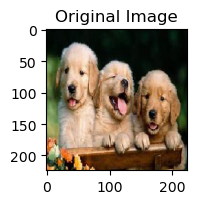

In [31]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 1)       0         
 g2D)                                                            
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 95ms/step


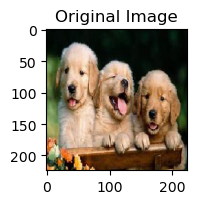

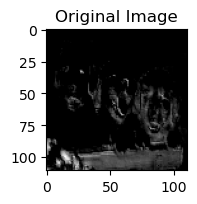

In [32]:
# Convert image to grey scale
model=models.Sequential()

# Sequentials() -->It allows us too create a linear stack of layers in a neural network
# You can add one layer at neural network at a time and each layer has connection only to the previous and next layer

model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))

# conv2D -->It represent 2D conventional Layer 

#Conventiional Layer -->>used to perform element wise multiplication or addition or division etc...

# layers.Conv2D(1) -->>1 is used to mention the number of filters in the conventional layer 
#(3,3) -->>set the size of filter

#(224,224,3) -->>224*224 -->>pixels with 3 color channel (RGB)

model.add(layers.MaxPooling2D((2,2)))

#MaxPooling2D() -->. it is used to set the dimensions of input data and extract important  features from Conv2D layer

model.summary()

# TO reshape the image 
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

plt.figure(figsize=(4,4))
plt.subplot(1,2,2)
plt.title("Original Image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [44]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [47]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [53]:
# Project 2

# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style

#Model_selection
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2 
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [66]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISY_DIR=r"C:\Users\HP\Downloads\archive (4)-20240219T091426Z-001\archive (4)\train\daisy"
FLOWER_SUNFLOWER_DIR=r"C:\Users\HP\Downloads\archive (4)-20240219T091426Z-001\archive (4)\train\sunflower"
FLOWER_TULPI_DIR=r"C:\Users\HP\Downloads\archive (4)-20240219T091426Z-001\archive (4)\train\tulip"
FLOWER_DANDI_DIR=r"C:\Users\HP\Downloads\archive (4)-20240219T091426Z-001\archive (4)\train\dandelion"
FLOWER_ROSE_DIR=r"C:\Users\HP\Downloads\archive (4)-20240219T091426Z-001\archive (4)\train\rose"

In [67]:
def assign_label(img,flower_type):
    return flower_type

In [68]:
# tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    Z.append(str(label))

In [69]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 501/501 [00:00<00:00, 528.16it/s]

501


make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

In [70]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:01<00:00, 429.67it/s]

996


In [71]:
make_train_data('Tulpi',FLOWER_TULPI_DIR)
print(len(X))

100%|██████████| 531/531 [00:01<00:00, 473.67it/s]

1527


In [72]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:02<00:00, 281.15it/s]

2173


In [73]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:01<00:00, 267.44it/s]

2670


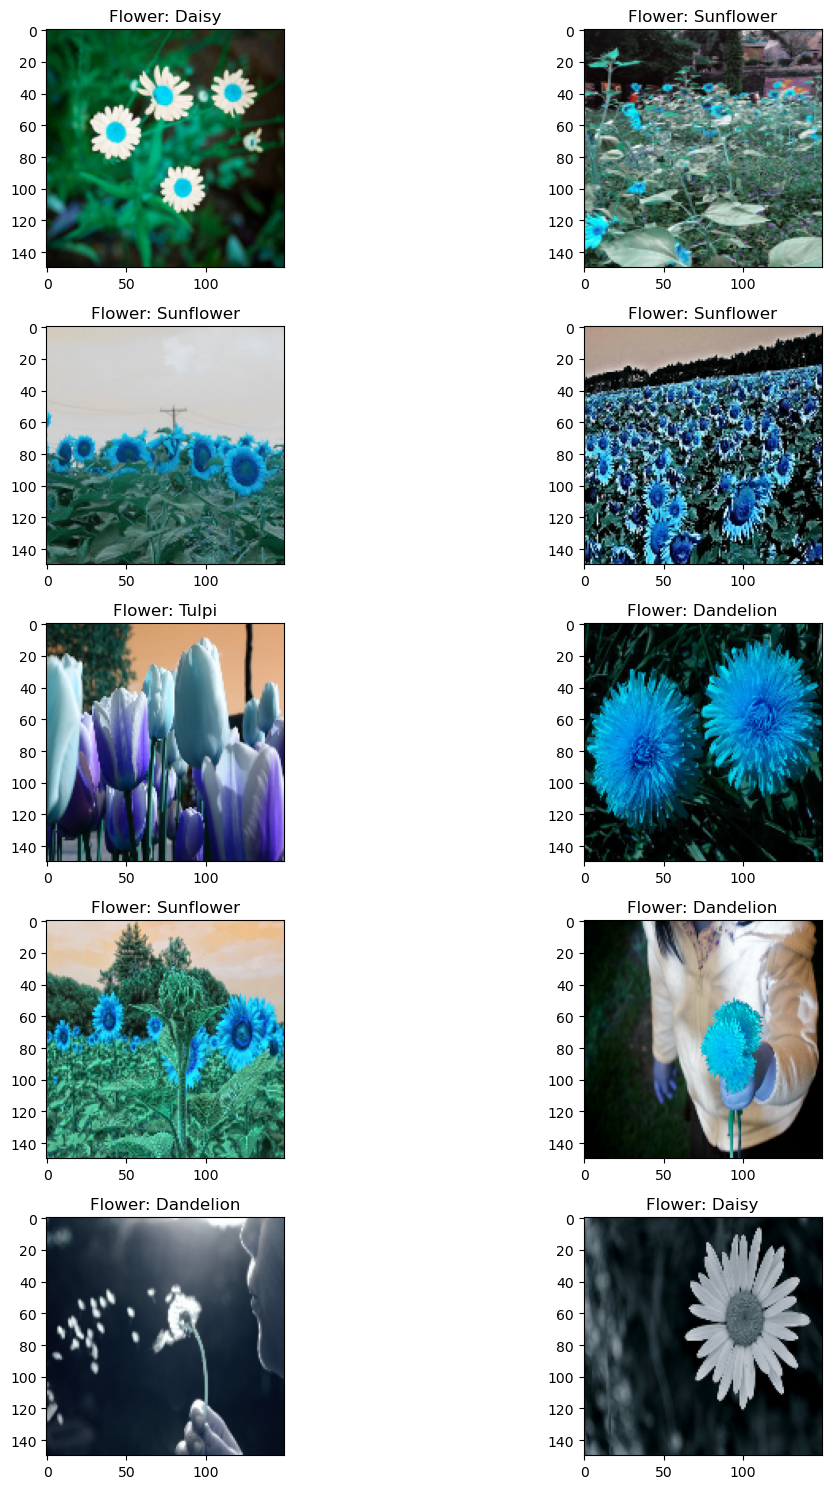

In [83]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()